# 就业的湖泊模型
## 大纲
除了 Anaconda 中包含的内容外，本讲座还需要以下库：

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 湖泊模型
这个模型有时被称为**湖泊模型**，因为存在两个工人群体：
1. 当前就业的工人。
2. 当前失业但正在寻找工作的工人。

两个"湖泊"之间的"流动"如下：
1. 工人以 $d$ 的比率退出劳动力市场。
2. 新工人以 $b$ 的比率进入劳动力市场。
3. 就业工人以 $\alpha$ 的比率与工作分离。
4. 失业工人以 $\lambda$ 的比率找到工作。

下图说明了湖泊模型。

```{figure} /_static/lecture_specific/lake_model/lake_model_worker.png
:name: lake_model_graphviz

湖泊模型的示意图
```

## 动态变化
设 $e_t$ 和 $u_t$ 分别表示在时间 $t$ 时就业和失业工人的数量。
工人总人口为 $n_t = e_t + u_t$。
因此，失业和就业工人的数量按以下方式变化：

```{math}
:label: lake_model

\begin{aligned}
    u_{t+1} &= (1-d)(1-\lambda)u_t + \alpha(1-d)e_t + bn_t \\
    &= ((1-d)(1-\lambda) + b)u_t + (\alpha(1-d) + b)e_t \\
    e_{t+1} &= (1-d)\lambda u_t + (1 - \alpha)(1-d)e_t
\end{aligned}
```

我们可以将{eq}`lake_model`安排为矩阵形式的线性方程组 $x_{t+1} = Ax_t$，其中

$$
x_{t+1} =
\begin{bmatrix}
    u_{t+1} \\
    e_{t+1}
\end{bmatrix}
\quad
A =
\begin{bmatrix}
    (1-d)(1-\lambda) + b & \alpha(1-d) + b \\
    (1-d)\lambda & (1 - \alpha)(1-d)
\end{bmatrix}
\quad \text{且} \quad
x_t =
\begin{bmatrix}
    u_t \\
    e_t
\end{bmatrix}.
$$

假设在 $t=0$ 时，我们有 $x_0 = \begin{bmatrix} u_0 & e_0 \end{bmatrix}^\top$。
那么，$x_1=Ax_0$，$x_2=Ax_1=A^2x_0$，因此 $x_t = A^tx_0$。
因此，该系统的长期结果可能取决于初始条件 $x_0$ 和矩阵 $A$。
我们关心 $u_t$ 和 $e_t$ 随时间如何演变。
我们应该预期什么样的长期失业率和就业率？
长期结果是否取决于初始值 $(u_0, e_o)$？

### 可视化长期结果
让我们首先绘制失业率 $u_t$、就业率 $e_t$ 和劳动力 $n_t$ 的时间序列图。

In [2]:
class LakeModel:
    """
    求解湖泊模型并计算失业存量和失业率的动态变化。

    参数：
     ------------
     λ：标量
    当前失业工人的找到工作的比率
    α：标量
    当前就业工人的解雇率
     b：标量
    进入劳动力市场的比率
     d：标量
    退出劳动力市场的比率
    """
    def __init__(self, λ=0.1, α=0.013, b=0.0124, d=0.00822):
        self.λ, self.α, self.b, self.d = λ, α, b, d

        λ, α, b, d = self.λ, self.α, self.b, self.d
        self.g = b - d
        g = self.g

        self.A = np.array([[(1-d)*(1-λ) + b,   α*(1-d) + b],
                           [        (1-d)*λ,   (1-α)*(1-d)]])


        self.ū = (1 + g - (1 - d) * (1 - α)) / (1 + g - (1 - d) * (1 - α) + (1 - d) * λ)
        self.ē = 1 - self.ū


    def simulate_path(self, x0, T=1000):
        """
        模拟就业和失业的序列

        参数
        ----------
        x0：数组
        包含初始值 (u0,e0)
        T：整数
        模拟的周期数

         返回值
        ----------
        x：迭代器
        包含就业率和失业率的序列
        """
        x0 = np.atleast_1d(x0)  # 以防万一，重新转换为数组
        x_ts= np.zeros((2, T))
        x_ts[:, 0] = x0
        for t in range(1, T):
            x_ts[:, t] = self.A @ x_ts[:, t-1]
        return x_ts

/tmp/ipykernel_5781/1720244336.py:26: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_5781/1720244336.py:26: UserWarning: Glyph 19994 (\N{CJK UNIFIED IDEOGRAPH-4E1A}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_5781/1720244336.py:26: UserWarning: Glyph 23601 (\N{CJK UNIFIED IDEOGRAPH-5C31}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_5781/1720244336.py:26: UserWarning: Glyph 21171 (\N{CJK UNIFIED IDEOGRAPH-52B3}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_5781/1720244336.py:26: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_5781/1720244336.py:26: UserWarning: Glyph 21147 (\N{CJK UNIFIED IDEOGRAPH-529B}) missing from current font.
  plt.tight_layout()
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22833 (\N{CJK UNI

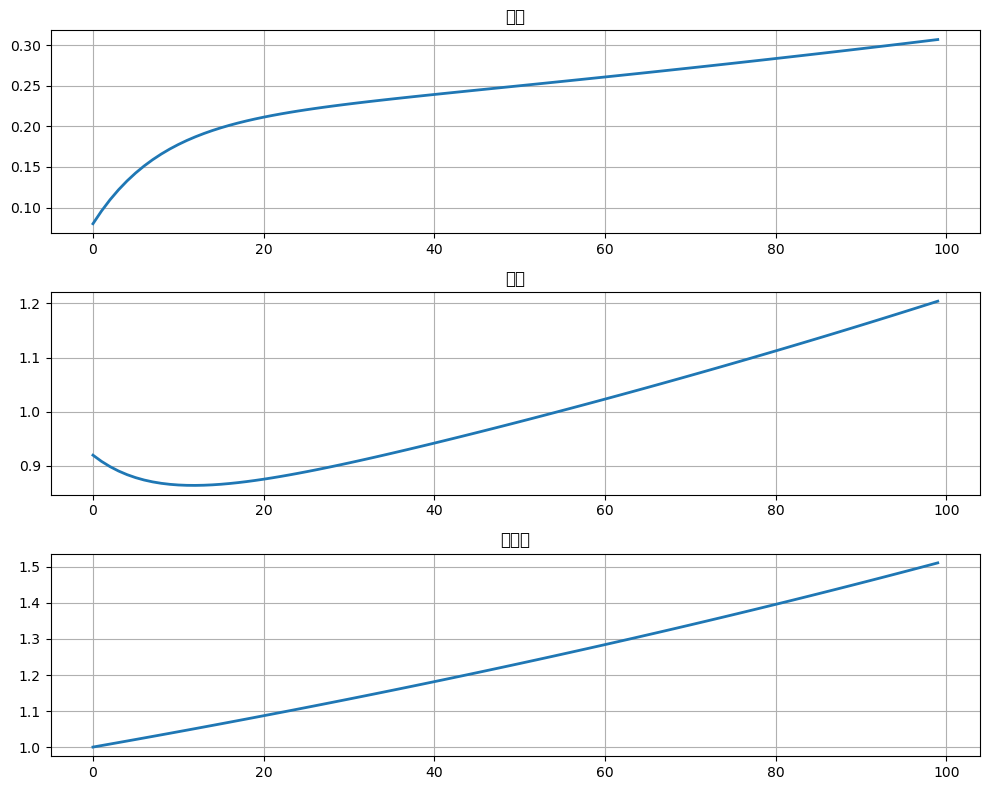

In [3]:
lm = LakeModel()
e_0 = 0.92          # 初始就业
u_0 = 1 - e_0       # 给定初始 n_0 = 1 的情况下的初始失业率

lm = LakeModel()
T = 100         # 模拟时长

x_0 = (u_0, e_0)
x_path = lm.simulate_path(x_0, T)

fig, axes = plt.subplots(3, 1, figsize=(10, 8))


axes[0].plot(x_path[0, :], lw=2)
axes[0].set_title('失业')

axes[1].plot(x_path[1, :], lw=2)
axes[1].set_title('就业')

axes[2].plot(x_path.sum(0), lw=2)
axes[2].set_title('劳动力')

for ax in axes:
    ax.grid()

plt.tight_layout()
plt.show()

将劳动力 $n_t$ 以恒定速率增长的观察结果并不令人惊讶。
这与失业和就业池只有一个流入源（新进入者池）的事实相吻合。
劳动力市场系统的流入和流出
在长期内由劳动力市场的固定退出率和进入率决定。
具体来说，令 $\mathbb{1}=[1, 1]^\top$ 为一个全1向量。
观察到

$$
    \begin{aligned}
    n_{t+1} &= u_{t+1} + e_{t+1} \\
    &= \mathbb{1}^\top x_{t+1} \\
    &= \mathbb{1}^\top A x_t \\
    &= (1 + b - d) (u_t + e_t) \\
    &= (1 + b - d) n_t.
    \end{aligned}
$$

因此，$n_t$ 的增长率固定为 $1 + b - d$。
此外，失业和就业的时间序列似乎在长期内以某些稳定的速率增长。

### 佩龙-弗罗贝尼乌斯定理的应用
直观上，如果我们将失业池和就业池视为一个封闭系统，其增长应与劳动力相似。
接下来我们询问 $e_t$ 和 $u_t$ 的长期增长率
是否也由 $1+b-d$ 主导，就像劳动力一样。
如果我们求助于{ref}`佩龙-弗罗贝尼乌斯定理<perron-frobe>`，答案将更加清晰。
佩龙-弗罗贝尼乌斯定理的重要性源于以下事实：
首先，在现实世界中，我们遇到的大多数矩阵都是非负矩阵。
其次，许多重要模型都是简单的线性迭代模型，
从初始条件 $x_0$ 开始，然后按规则 $x_{t+1} = Ax_t$ 或简写为 $x_t = A^tx_0$ 递归演变。
这个定理有助于表征主导特征值 $r(A)$，它
决定了这个迭代过程的行为。

#### 主导特征向量
现在我们通过展示佩龙-弗罗贝尼乌斯定理如何帮助我们分析湖泊模型来说明它的力量。
由于 $A$ 是非负且不可约的矩阵，佩龙-弗罗贝尼乌斯定理意味着：
- 谱半径 $r(A)$ 是 $A$ 的一个特征值，其中

$$
    r(A) := \max\{|\lambda|: \lambda \text{ 是 } A \text{ 的特征值 } \}
$$

- 任何其他特征值 $\lambda$ 的绝对值都严格小于 $r(A)$：$|\lambda|< r(A)$，
- 存在唯一且处处正的右特征向量 $\phi$（列向量）和左特征向量 $\psi$（行向量）：

$$
    A \phi = r(A) \phi, \quad  \psi A = r(A) \psi
$$

- 如果进一步 $A$ 是正的，那么当 $<\psi, \phi> = \psi \phi=1$ 时，我们有

$$
    r(A)^{-t} A^t \to \phi \psi
$$

最后一个陈述意味着长期来看，$A^t$ 的量级与 $r(A)^t$ 的量级相同，其中 $r(A)$ 在本讲座中可被视为主导特征值。
因此，长期来看，$x_t = A^t x_0$ 的量级也由 $r(A)^t$ 主导。
回想一下，谱半径受列和的约束：对于 $A \geq 0$，我们有

```{math}
:label: PF_bounds

\min_j \text{colsum}_j (A) \leq r(A) \leq \max_j \text{colsum}_j (A)
```

注意，对于 $j=1,2$，$\text{colsum}_j(A) = 1 + b - d$，根据{eq}`PF_bounds`，我们因此可以得出主特征值为 $r(A) = 1 + b - d$。

令 $g = b - d$ 表示总劳动力的整体增长率，因此 $r(A) = 1 + g$。

佩龙-弗罗贝尼乌斯定理意味着存在唯一的正特征向量 $\bar{x} = \begin{bmatrix} \bar{u} \\ \bar{e} \end{bmatrix}$，
使得 $A\bar{x} = r(A)\bar{x}$ 且 $\begin{bmatrix} 1 & 1 \end{bmatrix} \bar{x} = 1$：

```{math}
:label: steady_x

\begin{aligned}
    \bar{u} & = \frac{b + \alpha (1-d)}{b + (\alpha+\lambda)(1-d)} \\
    \bar{e} & = \frac{\lambda(1-d)}{b + (\alpha+\lambda)(1-d)}
\end{aligned}
```

由于 $\bar{x}$ 是对应于主特征值 $r(A)$ 的特征向量，我们称 $\bar{x}$ 为主特征向量。
这个主特征向量在确定长期结果方面起着重要作用，如下所示。

In [4]:
def plot_time_paths(lm, x0=None, T=1000, ax=None):
        """
        绘制模拟的时间序列图。
        参数
        ----------
        lm : 类
            湖泊模型
        x0 : 数组
            包含一些不同的初始值。
        T : 整数
            要模拟的周期数

        """


        if x0 is None:
            x0 = np.array([[5.0, 0.1]])

        ū, ē = lm.ū, lm.ē

        x0 = np.atleast_2d(x0)

        if ax is None:
            fig, ax = plt.subplots(figsize=(10, 8))
            # Plot line D
            s = 10
            ax.plot([0, s * ū], [0, s * ē], "k--", lw=1, label='set $D$')

        # Set the axes through the origin
        for spine in ["left", "bottom"]:
            ax.spines[spine].set_position("zero")
        for spine in ["right", "top"]:
            ax.spines[spine].set_color("none")

        ax.set_xlim(-2, 6)
        ax.set_ylim(-2, 6)
        ax.set_xlabel("unemployed workforce")
        ax.set_ylabel("employed workforce")
        ax.set_xticks((0, 6))
        ax.set_yticks((0, 6))




        # 绘制时间序列
        for x in x0:
            x_ts = lm.simulate_path(x0=x)

            ax.scatter(x_ts[0, :], x_ts[1, :], s=4,)

            u0, e0 = x
            ax.plot([u0], [e0], "ko", ms=2, alpha=0.6)
            ax.annotate(f'$x_0 = ({u0},{e0})$',
                        xy=(u0, e0),
                        xycoords="data",
                        xytext=(0, 20),
                        textcoords="offset points",
                        arrowprops=dict(arrowstyle = "->"))

        ax.plot([ū], [ē], "ko", ms=4, alpha=0.6)
        ax.annotate(r'$\bar{x}$',
                xy=(ū, ē),
                xycoords="data",
                xytext=(20, -20),
                textcoords="offset points",
                arrowprops=dict(arrowstyle = "->"))

        if ax is None:
            plt.show()

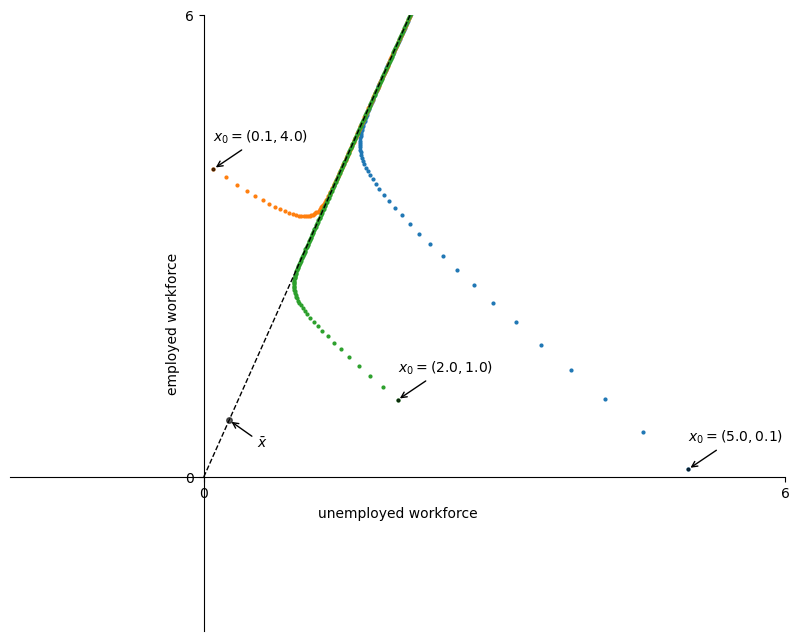

In [5]:
lm = LakeModel(α=0.01, λ=0.1, d=0.02, b=0.025)
x0 = ((5.0, 0.1), (0.1, 4.0), (2.0, 1.0))
plot_time_paths(lm, x0=x0)

由于 $\bar{x}$ 是对应于特征值 $r(A)$ 的特征向量，集合
$D := \{ x \in \mathbb{R}^2 : x = \alpha \bar{x} \; \text{对某些} \; \alpha >0 \}$ 中的所有向量也都是对应于 $r(A)$ 的特征向量。
这个集合 $D$ 在上图中由虚线表示。
图中说明了对于两个不同的初始条件 $x_0$，迭代序列 $(A^t x_0)_{t \geq 0}$ 随时间向 $D$ 移动。
这表明所有这样的序列在长期内都具有很强的相似性，由主特征向量 $\bar{x}$ 决定。

#### 负增长率
在上面说明的例子中，我们考虑的参数使得劳动力的总体增长率 $g>0$。
现在假设我们面临 $g<0$ 的情况，即劳动力呈负增长。
这意味着 $b-d<0$，即工人退出市场的速度快于进入市场的速度。
现在迭代序列 $x_{t+1} = Ax_t$ 的行为会是什么样的？
这在下面进行了可视化。

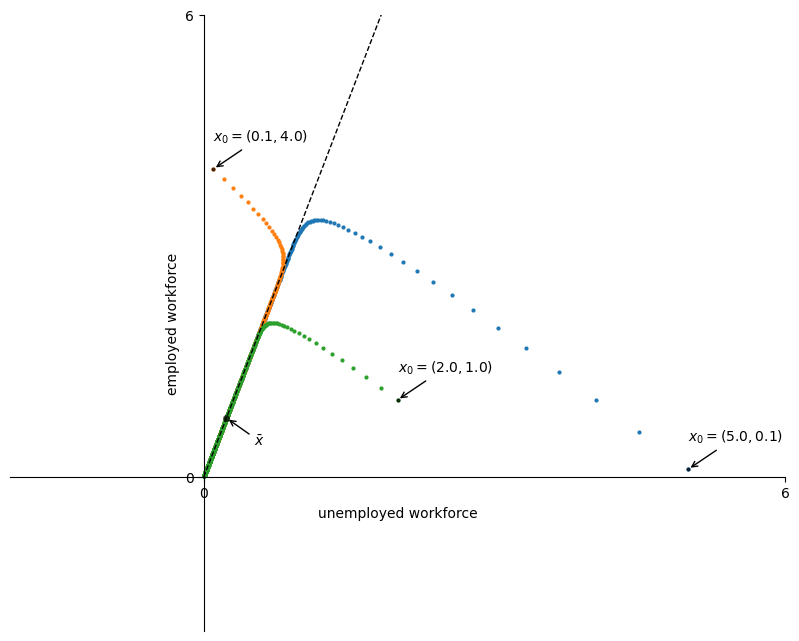

In [6]:
lm = LakeModel(α=0.01, λ=0.1, d=0.025, b=0.02)
plot_time_paths(lm, x0=x0)

因此，虽然迭代序列仍然朝着主特征向量 $\bar{x}$ 移动，但在这种情况下，它们收敛到原点。
这是由于 $r(A)<1$ 的事实，这确保了迭代序列 $(A^t x_0)_{t \geq 0}$ 将收敛到某个点，在这种情况下是 $(0,0)$。
这引导我们到下一个结果。

### 性质

由于 $A$ 的列和为 $r(A)=1$，左特征向量是 $\mathbb{1}^\top=[1, 1]$。
佩龙-弗罗贝尼乌斯理论意味着

$$
r(A)^{-t} A^{t} \approx \bar{x} \mathbb{1}^\top = \begin{bmatrix} \bar{u} & \bar{u} \\ \bar{e} & \bar{e} \end{bmatrix}.
$$

因此，对于任何 $x_0 = (u_0, e_0)^\top$，我们有

$$
\begin{aligned}
x_t = A^t x_0 &\approx r(A)^t \begin{bmatrix} \bar{u} & \bar{u} \\ \bar{e} & \bar{e} \end{bmatrix} \begin{bmatrix}u_0 \\ e_0 \end{bmatrix} \\
&= (1+g)^t(u_0 + e_0) \begin{bmatrix}\bar{u} \\ \bar{e} \end{bmatrix} \\
&= (1 + g)^t n_0 \bar{x} \\
&= n_t \bar{x}.
\end{aligned}
$$

当 $t$ 足够大时。

我们看到，在长期内，$u_t$ 和 $e_t$ 的增长也由 $r(A) = 1+g$ 主导：当 $r(A) > 1$ 时，$x_t$ 沿着 $D$ 增长，当 $r(A) < 1$ 时，收敛到 $(0, 0)$。
此外，长期失业和就业是 $n_t$ 的稳定比例。
后者意味着 $\bar{u}$ 和 $\bar{e}$ 分别是长期失业率和就业率。
具体来说，我们有失业率和就业率：当 $t \to \infty$ 时，$x_t / n_t = A^t n_0 / n_t \to \bar{x}$。

为了说明这些比率的动态，令 $\hat{A} := A / (1+g)$ 为 $r_t := x_t/ n_t$ 的转移矩阵。
比率的动态遵循

$$
r_{t+1} = \frac{x_{t+1}}{n_{t+1}} = \frac{x_{t+1}}{(1+g) n_{t}} = \frac{A x_t}{(1+g)n_t} = \hat{A} \frac{x_t}{n_t}
=\hat{A} r_t.
$$

注意到 $\hat{A}$ 的列和都为 1，因此 $r(\hat{A})=1$。
可以验证 $\bar{x}$ 也是 $\hat{A}$ 对应于 $r(\hat{A})$ 的右特征向量，即 $\bar{x} = \hat{A} \bar{x}$。
此外，对于任何 $r_0 = x_0 / n_0$，当 $t \to \infty$ 时，$\hat{A}^t r_0 \to \bar{x}$，因为上述讨论意味着

$$
r_t = \hat{A}^t r_0 = (1+g)^{-t} A^t r_0 = r(A)^{-t} A^t r_0 \to \begin{bmatrix} \bar{u} & \bar{u} \\ \bar{e} & \bar{e} \end{bmatrix} r_0 = \begin{bmatrix} \bar{u} \\  \bar{e} \end{bmatrix}. 
$$

这在下面有所说明。

/tmp/ipykernel_5781/3028385964.py:31: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_5781/3028385964.py:31: UserWarning: Glyph 19994 (\N{CJK UNIFIED IDEOGRAPH-4E1A}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_5781/3028385964.py:31: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_5781/3028385964.py:31: UserWarning: Glyph 23601 (\N{CJK UNIFIED IDEOGRAPH-5C31}) missing from current font.
  plt.tight_layout()
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


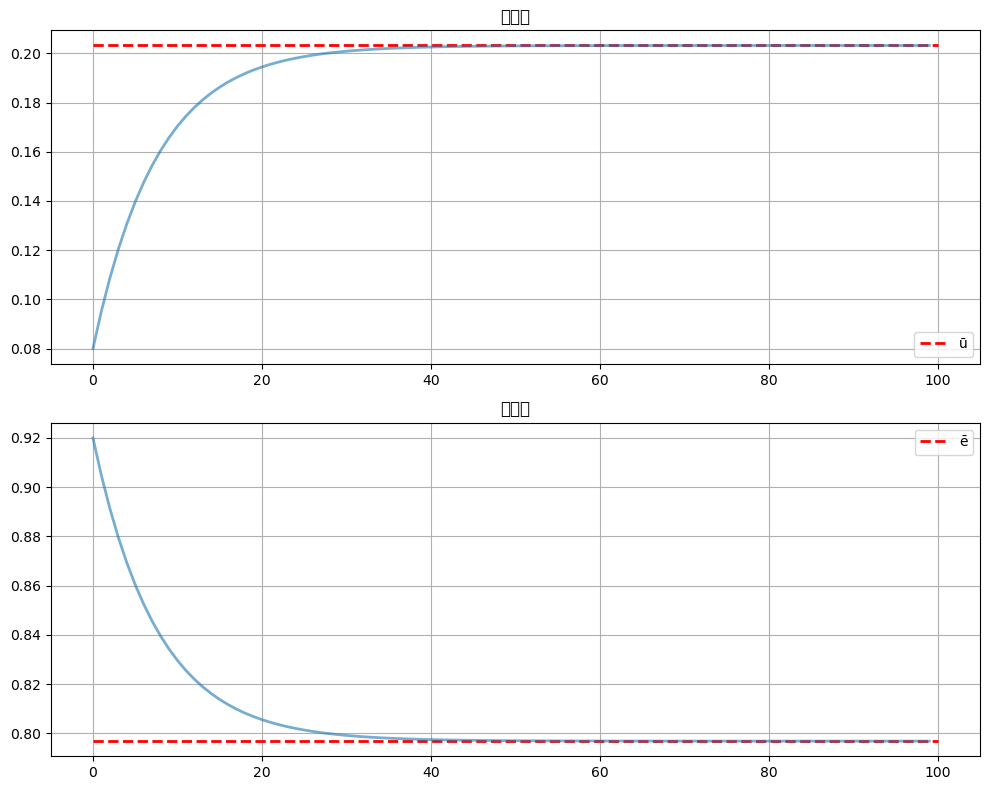

In [7]:
lm = LakeModel()
e_0 = 0.92          # 初始就业
u_0 = 1 - e_0       # 给定初始 n_0 = 1 的情况下的初始失业率

lm = LakeModel()
T = 100         # 模拟时长

x_0 = (u_0, e_0)

x_path = lm.simulate_path(x_0, T)

rate_path = x_path / x_path.sum(0)

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# 绘制稳态 ū 和 ē
axes[0].hlines(lm.ū, 0, T, 'r', '--', lw=2, label='ū')
axes[1].hlines(lm.ē, 0, T, 'r', '--', lw=2, label='ē')

titles = ['失业率', '就业率']
locations = ['lower right', 'upper right']

# 绘制失业率和就业率
for i, ax in enumerate(axes):
    ax.plot(rate_path[i, :], lw=2, alpha=0.6)
    ax.set_title(titles[i])
    ax.grid()
    ax.legend(loc=locations[i])


plt.tight_layout()
plt.show()

为了更直观地理解收敛性，我们在下面不使用佩龙-弗罗贝尼乌斯定理进一步解释收敛过程。

假设 $\hat{A} = P D P^{-1}$ 是可对角化的，其中 $P = [v_1, v_2]$ 由 $\hat{A}$ 的特征向量 $v_1$ 和 $v_2$ 组成，
分别对应于特征值 $\gamma_1$ 和 $\gamma_2$，
且 $D = \text{diag}(\gamma_1, \gamma_2)$。
令 $\gamma_1 = r(\hat{A})=1$ 且 $|\gamma_2| < \gamma_1$，使得谱半径是一个主导特征值。
比率的动态遵循 $r_{t+1} = \hat{A} r_t$，其中 $r_0$ 是一个概率向量：$\sum_j r_{0,j}=1$。
考虑 $z_t = P^{-1} r_t $。
那么，我们有 $z_{t+1} = P^{-1} r_{t+1} = P^{-1} \hat{A} r_t = P^{-1} \hat{A} P z_t = D z_t$。
因此，我们得到 $z_t = D^t z_0$，对于某个 $z_0 = (c_1, c_2)^\top$，我们有
$$
r_t = P z_t = \begin{bmatrix} v_1 & v_2 \end{bmatrix}  \begin{bmatrix} \gamma_1^t & 0 \\ 0 & \gamma_2^t \end{bmatrix}
\begin{bmatrix} c_1 \\ c_2 \end{bmatrix} = c_1 \gamma_1^t v_1 + c_2 \gamma_2^t v_2.
$$
由于 $|\gamma_2| < |\gamma_1|=1$，右侧的第二项收敛到零。
因此，收敛过程遵循 $r_t \to c_1 v_1$。
由于 $\hat{A}$ 的列和为 1，且 $r_0$ 是一个概率向量，$r_t$ 必须是一个概率向量。
在这种情况下，$c_1 v_1$ 必须是一个归一化的特征向量，所以 $c_1 v_1 = \bar{x}$，然后 $r_t \to \bar{x}$。

## 练习
```{exercise-start} 失业率和就业率的演化
:label: lake_model_ex1
```

如果分离率 $\alpha$ 增加或求职率 $\lambda$ 下降，长期失业率和就业率会如何演变？
这个结果是否符合你的直觉？
绘制图表来说明直线 $D := \{ x \in \mathbb{R}^2 : x = \alpha \bar{x} \; \text{对某些} \; \alpha >0 \}$
在失业-就业空间中如何移动。

```{exercise-end}
```

```{solution-start} lake_model_ex1
:class: dropdown
```

方程 {eq}`steady_x` 表明，如果 $\alpha$ 增加或 $\lambda$ 减少，长期失业率将会上升，而就业率将会下降。
首先假设 $\alpha=0.01, \lambda=0.1, d=0.02, b=0.025$。
假设 $\alpha$ 增加到 $0.04$。
下图说明了直线 $D$ 顺时针向下移动，这表明随着分离率的增加，失业人口的比例上升。

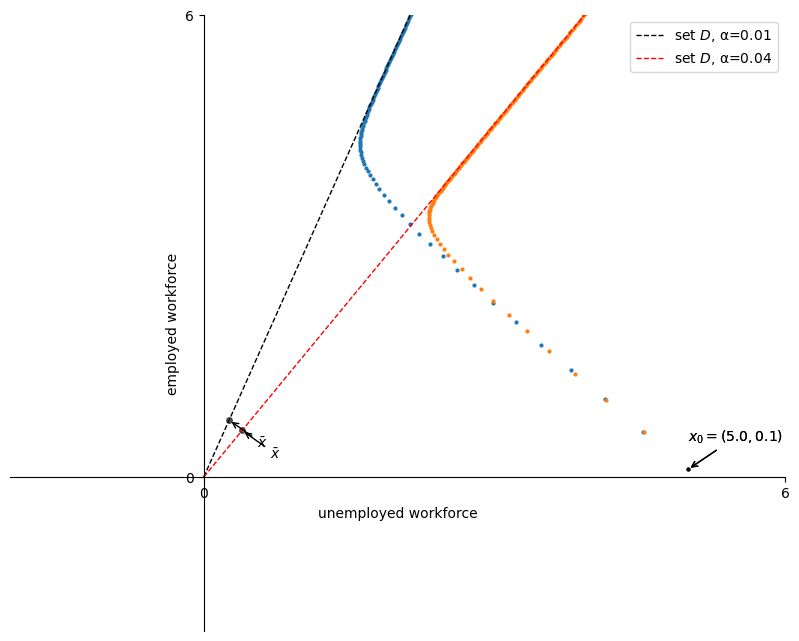

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))

lm = LakeModel(α=0.01, λ=0.1, d=0.02, b=0.025)
plot_time_paths(lm, ax=ax)
s=10
ax.plot([0, s * lm.ū], [0, s * lm.ē], "k--", lw=1, label='set $D$, α=0.01')

lm = LakeModel(α=0.04, λ=0.1, d=0.02, b=0.025)
plot_time_paths(lm, ax=ax)
ax.plot([0, s * lm.ū], [0, s * lm.ē], "r--", lw=1, label='set $D$, α=0.04')

ax.legend(loc='best')
plt.show()

```{solution-end}
```